# Aggregations and Visuzalizations
* Uses Presenter2

In [20]:
from scripts.presentation import Presenter2
# Contains aligned results (aligned + sentence split with bertalign)
p = Presenter2(results_folder='final_results', metrics=['BLEU', 'chrF'])

## BLEU & chrF correlations

* We can compute Pearson and Spearman correlation coefficient for each dataset/translator pair

In [21]:
datasets = ['ep', 'flores', 'opus']
translators = ['deepl', 'gpt']

for d in datasets:
    for t in translators:
        config1 = {
            'datasets' : [d],
            'translators' : [t],
            'metric' : 'BLEU'
        }
        config2 = {
            'datasets' : [d],
            'translators' : [t],
            'metric' : 'chrF'
        }
        p.show_correlations(config1, config2)

Datasets: ['ep'] : ['ep']
Translators: ['deepl'] : ['deepl']
Pearson correlation: 0.84 (p = 8.8e-31)
Spearman correlation: 0.84 (p = 4.6e-31)

Datasets: ['ep'] : ['ep']
Translators: ['gpt'] : ['gpt']
Pearson correlation: 0.88 (p = 4.1e-36)
Spearman correlation: 0.89 (p = 2.6e-39)

Datasets: ['flores'] : ['flores']
Translators: ['deepl'] : ['deepl']
Pearson correlation: 0.94 (p = 6.1e-53)
Spearman correlation: 0.92 (p = 5.4e-47)

Datasets: ['flores'] : ['flores']
Translators: ['gpt'] : ['gpt']
Pearson correlation: 0.95 (p = 7.5e-55)
Spearman correlation: 0.93 (p = 4.7e-49)

Datasets: ['opus'] : ['opus']
Translators: ['deepl'] : ['deepl']
Pearson correlation: 0.80 (p = 2.0e-05)
Spearman correlation: 0.83 (p = 7.4e-06)

Datasets: ['opus'] : ['opus']
Translators: ['gpt'] : ['gpt']
Pearson correlation: 0.85 (p = 2.4e-06)
Spearman correlation: 0.83 (p = 5.1e-06)



* All correlation coefficients are statistically significant, $p < 0.005$ resp. $p < 5\texttt{e-03}$
* From the cases where we have 110 language directions, dataset=ep and translator=deepl have the lowest Pearson correlation of 0.84. So let us focus on this case and visualize it.

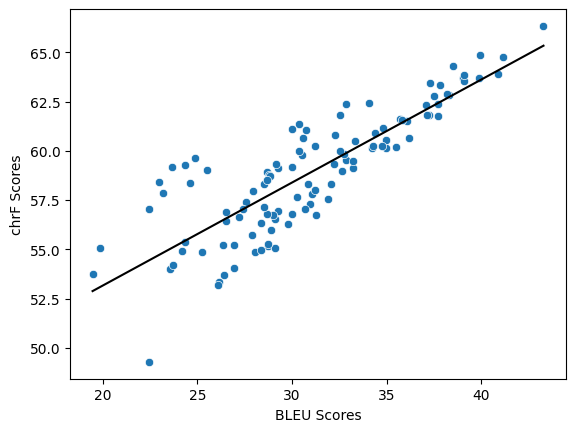

In [22]:
config1 = {
    'datasets' : ['ep'],
    'translators' : ['deepl'],
    'metric' : 'BLEU'
}
config2 = {
    'datasets' : ['ep'],
    'translators' : ['deepl'],
    'metric' : 'chrF'
}
data, model = p.linear_regression(config1, config2, x_label='BLEU Scores', y_label='chrF Scores')

In [23]:
outliers = p.top_n_residuals(data, model, top_n=20)

In [24]:
outliers['residual']

93     5.166284
109    4.103402
105    3.914008
104    3.857913
106    3.665423
99     3.155901
108    3.067389
97     3.023231
100    2.996946
53     2.835582
25     2.811025
83     2.803276
102    2.785615
92     2.764235
28     2.738632
101    2.621449
96     2.586758
2      2.532241
24     2.477094
91     2.473682
Name: residual, dtype: float64

In [25]:
outliers.value_counts('src_lang'), outliers.value_counts('tgt_lang')

(src_lang
 nl    4
 fr    3
 de    2
 el    2
 es    2
 sv    2
 da    1
 en    1
 fi    1
 it    1
 pt    1
 Name: count, dtype: int64,
 tgt_lang
 fi    8
 el    6
 de    3
 da    1
 es    1
 pt    1
 Name: count, dtype: int64)

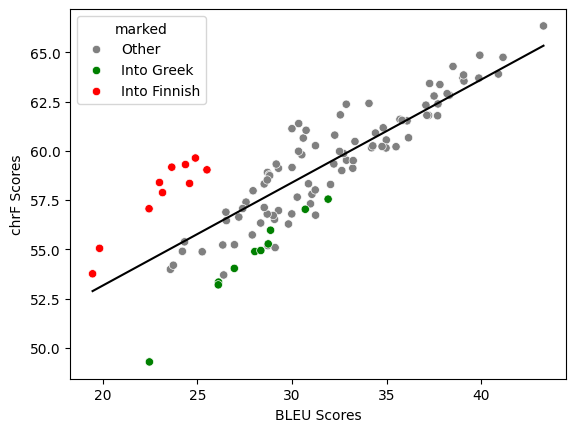

In [26]:
_  =p.linear_regression(
    config1, config2, x_label='BLEU Scores', y_label='chrF Scores', custom_color={'tgt_lang':{'fi':'red', 'el':'green'}}
)

ep-gpt


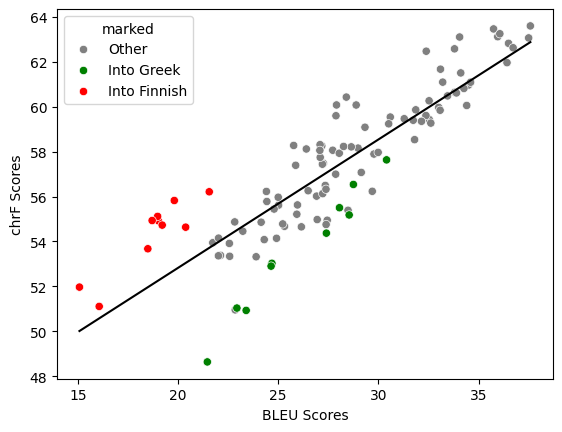

flores-deepl


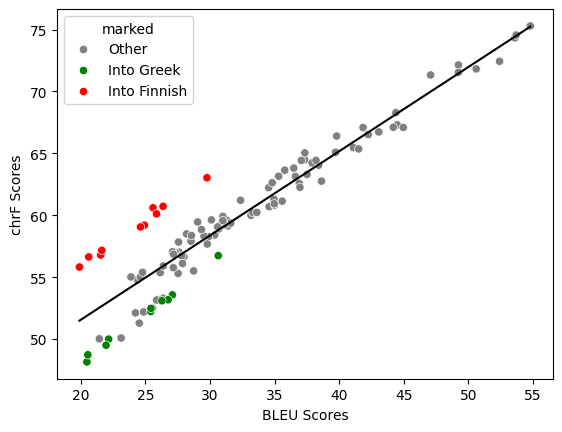

flores-gpt


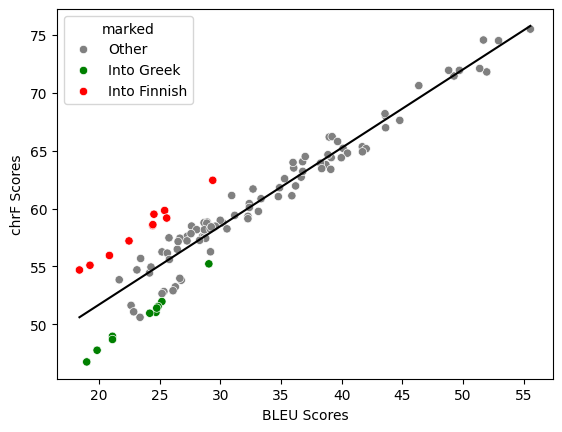

In [27]:
for d in datasets:
    for t in translators:
        if d=='ep' and t=='deepl':
            continue
        if d=='opus':
            continue
        config1 = {
            'datasets': [d],
            'translators': [t],
            'metric': 'BLEU'
        }
        config2 = {
            'datasets': [d],
            'translators': [t],
            'metric': 'chrF'
        }
        print(f'{d}-{t}')
        _ = p.linear_regression(config1, config2, x_label='BLEU Scores', y_label='chrF Scores',
                                custom_color={'tgt_lang':{'fi':'red', 'el':'green'}})

* Finnish and Greek are outliers
* Unclear if it is a coincidence that those pairs which GPT4.1 struggled to produce are also the ones that tend to be outliers of the linear regression
* Implies that metric plays a role in assessing translation quality for some languages.

## Other Correlations
* We made the visualization tool somewhat configurable, allowing us to explore different kinds of correlations.

In [28]:
datasets = ['ep', 'flores', 'opus']
for d in datasets:
        config1 = {
            'datasets': [d],
            'translators': ['deepl'],
            'metric': 'BLEU'
        }
        config2 = {
            'datasets': [d],
            'translators': ['gpt'],
            'metric': 'chrF'
        }
        p.show_correlations(config1, config2)

Datasets: ['ep'] : ['ep']
Translators: ['deepl'] : ['gpt']
Pearson correlation: 0.84 (p = 2.4e-30)
Spearman correlation: 0.85 (p = 2.5e-31)

Datasets: ['flores'] : ['flores']
Translators: ['deepl'] : ['gpt']
Pearson correlation: 0.92 (p = 7.7e-47)
Spearman correlation: 0.90 (p = 2.4e-41)

Datasets: ['opus'] : ['opus']
Translators: ['deepl'] : ['gpt']
Pearson correlation: 0.90 (p = 4.7e-08)
Spearman correlation: 0.89 (p = 1.5e-07)



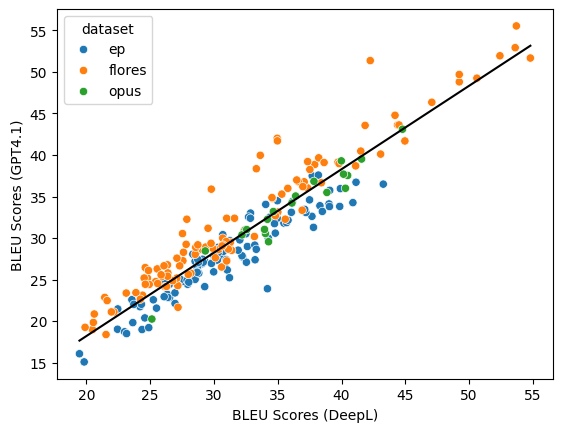

In [29]:
# Visualization below does not correspond directly to the correlations
# We do linear regression on ALL data points but then distinguish datasets by color
config1 = {
    'datasets': ['ep', 'flores', 'opus'],
    'translators': ['deepl'],
    'metric': 'BLEU'
}

config2 = {
    'datasets': ['ep', 'flores', 'opus'],
    'translators': ['gpt'],
    'metric': 'BLEU'
}

_ = p.linear_regression(config1, config2, x_label='BLEU Scores (DeepL)', y_label='BLEU Scores (GPT4.1)', color_by='dataset')

* Dataset depending correlations for 110 pairs

In [30]:
for t in ['deepl', 'gpt']:
    config1 = {
        'datasets': ['ep'],
        'translators': [t],
        'metric': 'BLEU'
    }

    config2 = {
        'datasets': ['flores'],
        'translators': [t],
        'metric': 'BLEU'
    }
    print(f'{t}')
    p.show_correlations(config1, config2)
    data, model = p.linear_regression(config1, config2, x_label='BLEU Scores (EP)',
                            y_label='BLEU Scores (FLORES)', plot=False)
    outliers = p.top_n_residuals(data, model, top_n=20)
    print(outliers['src_lang'].value_counts())
    print(outliers['tgt_lang'].value_counts())


deepl
Datasets: ['ep'] : ['flores']
Translators: ['deepl'] : ['deepl']
Pearson correlation: 0.62 (p = 8.7e-13)
Spearman correlation: 0.58 (p = 2.7e-11)

src_lang
en    5
pt    2
fr    2
da    2
sv    2
de    2
es    2
el    1
fi    1
it    1
Name: count, dtype: int64
tgt_lang
es    9
en    5
sv    1
fr    1
da    1
el    1
de    1
pt    1
Name: count, dtype: int64
gpt
Datasets: ['ep'] : ['flores']
Translators: ['gpt'] : ['gpt']
Pearson correlation: 0.48 (p = 1.5e-07)
Spearman correlation: 0.47 (p = 2.8e-07)

src_lang
en    5
pt    2
sv    2
da    2
es    2
fr    2
de    2
el    1
it    1
fi    1
Name: count, dtype: int64
tgt_lang
es    6
en    5
pt    4
fr    1
sv    1
el    1
de    1
da    1
Name: count, dtype: int64


* Based on residuals, we can expect into Spanish translations to be a potential outlier

deepl
Datasets: ['ep'] : ['flores']
Translators: ['deepl'] : ['deepl']
Pearson correlation: 0.62 (p = 8.7e-13)
Spearman correlation: 0.58 (p = 2.7e-11)



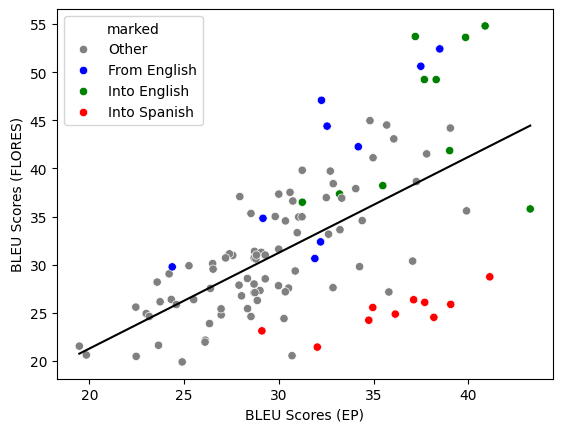

gpt
Datasets: ['ep'] : ['flores']
Translators: ['gpt'] : ['gpt']
Pearson correlation: 0.48 (p = 1.5e-07)
Spearman correlation: 0.47 (p = 2.8e-07)



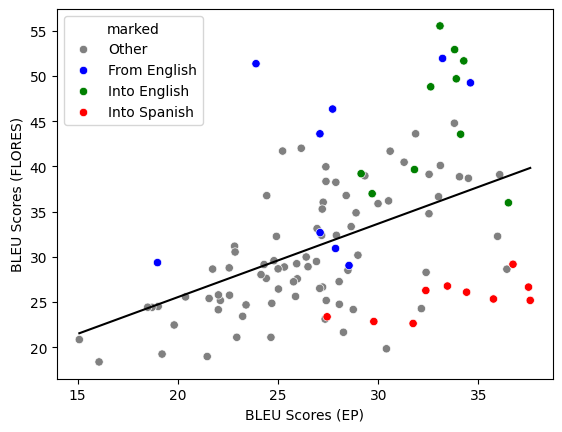

In [31]:
for t in ['deepl', 'gpt']:
    config1 = {
        'datasets': ['ep'],
        'translators': [t],
        'metric': 'BLEU'
    }

    config2 = {
        'datasets': ['flores'],
        'translators': [t],
        'metric': 'BLEU'
    }
    print(f'{t}')
    p.show_correlations(config1, config2)
    _ = p.linear_regression(config1, config2, x_label='BLEU Scores (EP)',
                                      y_label='BLEU Scores (FLORES)', 
                                      plot=True, 
                                      custom_color={'tgt_lang':{'es':'red', 'en':'green'}, 
                                                    'src_lang':{'en':'blue'}})
       

deepl
Datasets: ['ep'] : ['flores']
Translators: ['deepl'] : ['deepl']
Pearson correlation: 0.56 (p = 1.3e-10)
Spearman correlation: 0.54 (p = 1.6e-09)



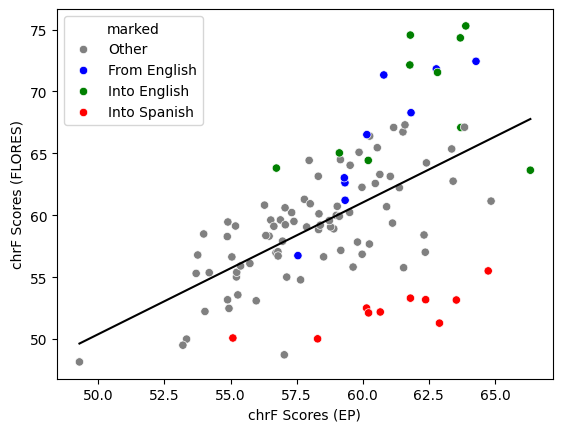

gpt
Datasets: ['ep'] : ['flores']
Translators: ['gpt'] : ['gpt']
Pearson correlation: 0.39 (p = 2.2e-05)
Spearman correlation: 0.38 (p = 5.4e-05)



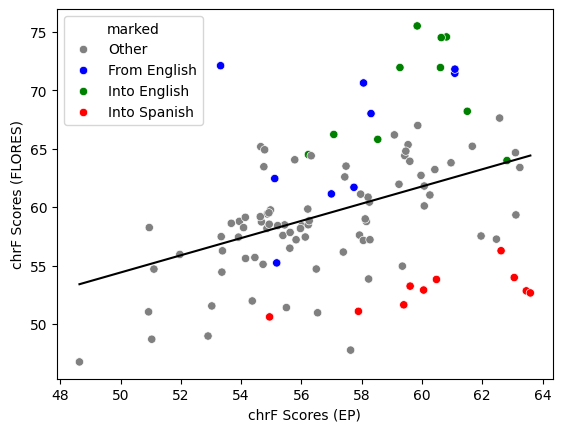

In [32]:
for t in ['deepl', 'gpt']:
    config1 = {
        'datasets': ['ep'],
        'translators': [t],
        'metric': 'chrF'
    }

    config2 = {
        'datasets': ['flores'],
        'translators': [t],
        'metric': 'chrF'
    }
    print(f'{t}')
    p.show_correlations(config1, config2)
    _ = p.linear_regression(config1, config2, x_label='chrF Scores (EP)',
                            y_label='chrF Scores (FLORES)',
                            plot=True,
                            custom_color={'tgt_lang': {'es': 'red', 'en': 'green'},
                                          'src_lang': {'en': 'blue'}})

* Dataset dependent correlations for 20 pairs

deepl
Datasets: ['ep'] : ['opus']
Translators: ['deepl'] : ['deepl']
Pearson correlation: 0.84 (p = 3.6e-06)
Spearman correlation: 0.80 (p = 1.9e-05)



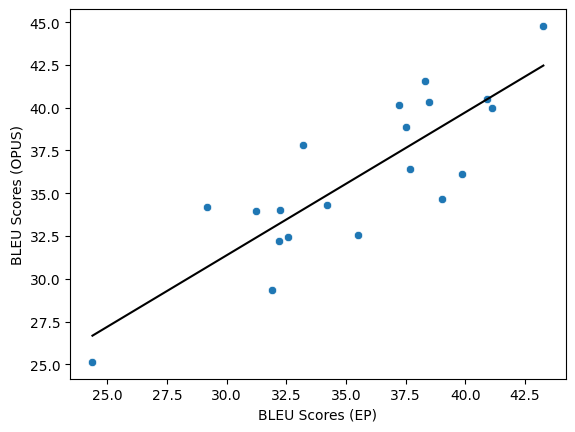

deepl
Datasets: ['flores'] : ['opus']
Translators: ['deepl'] : ['deepl']
Pearson correlation: 0.48 (p = 3.4e-02)
Spearman correlation: 0.51 (p = 2.1e-02)



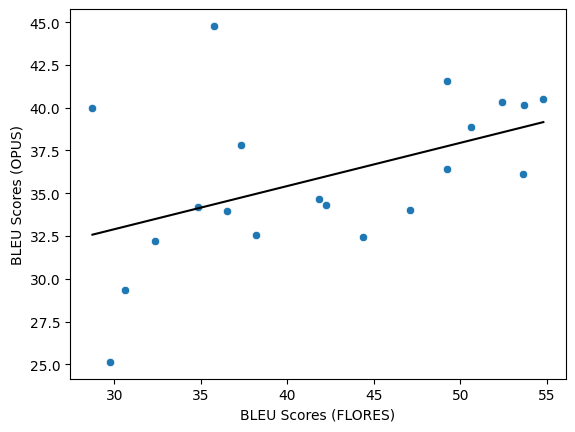

gpt
Datasets: ['ep'] : ['opus']
Translators: ['gpt'] : ['gpt']
Pearson correlation: 0.87 (p = 5.3e-07)
Spearman correlation: 0.82 (p = 1.1e-05)



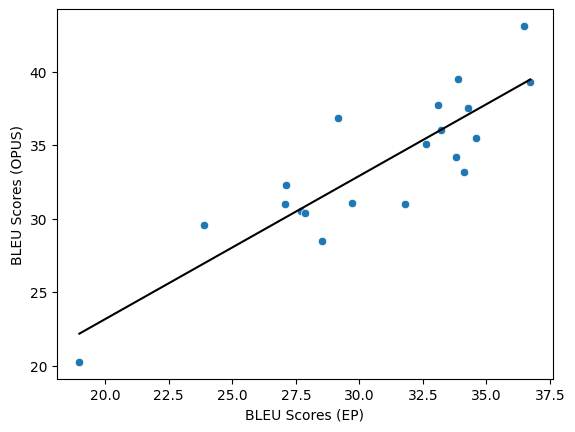

gpt
Datasets: ['flores'] : ['opus']
Translators: ['gpt'] : ['gpt']
Pearson correlation: 0.35 (p = 1.3e-01)
Spearman correlation: 0.34 (p = 1.4e-01)



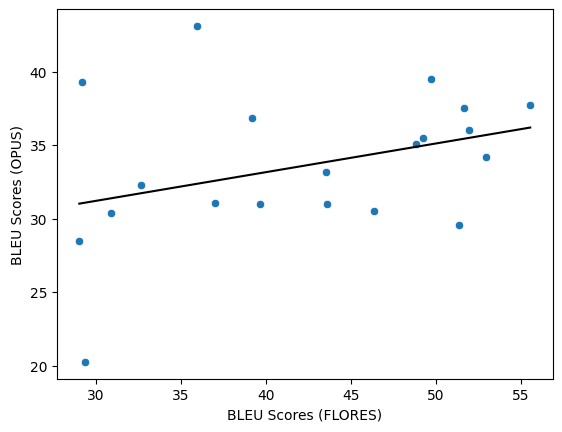

In [33]:
for t in ['deepl', 'gpt']:
    for d in ['ep', 'flores']:
        config1 = {
            'datasets': [d],
            'translators': [t],
            'metric': 'BLEU',
            'src_lang': ['en'],
            'tgt_lang': ['en']
        }

        config2 = {
            'datasets': ['opus'],
            'translators': [t],
            'metric': 'BLEU',
            'src_lang': ['en'],
            'tgt_lang': ['en']
        }
        print(f'{t}')
        p.show_correlations(config1, config2)
        _ = p.linear_regression(config1, config2, x_label=f'BLEU Scores ({d.upper()})',
                                y_label='BLEU Scores (OPUS)')


* The correlation between Europarl and Flores+ are stronger for DeepL than GPT4.1 (using 110 datapoints)
* If we look at the smaller subset of 20 datapoints (from/into English) translations, we observe that for both translators, Europarl / OPUS has higher correlation than Flores+ & OPUS.

## Matrices
* The crux of this project was reproducing the score matrix shown in Koehn's paper, so we do it here with heatmaps and special order to gain more insights

ep-deepl


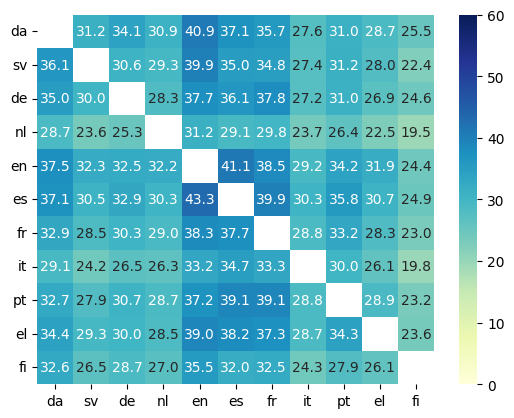


ep-gpt


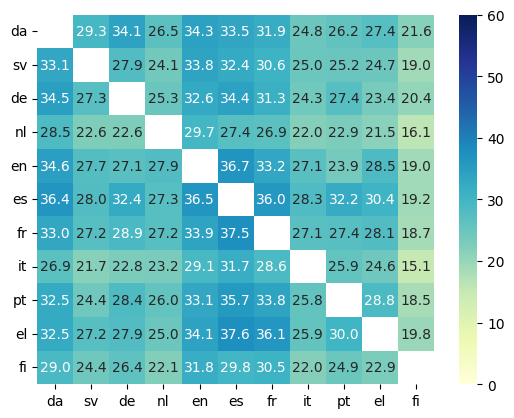


flores-deepl


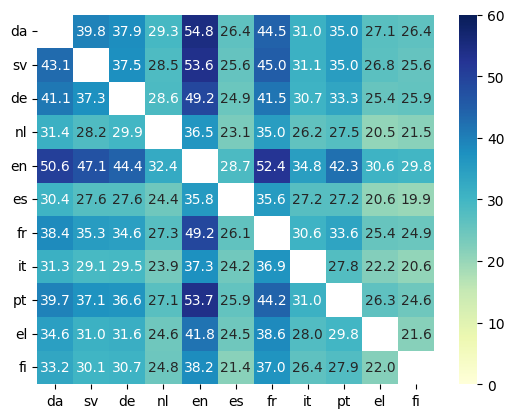


flores-gpt


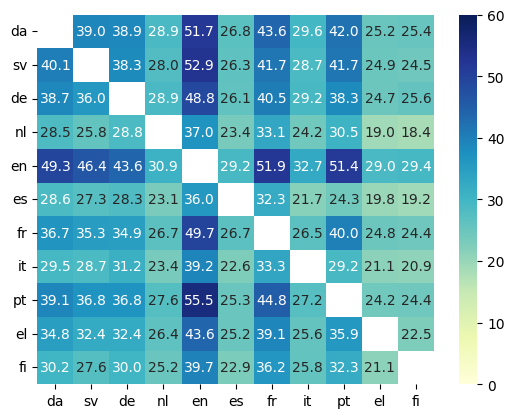


opus-deepl


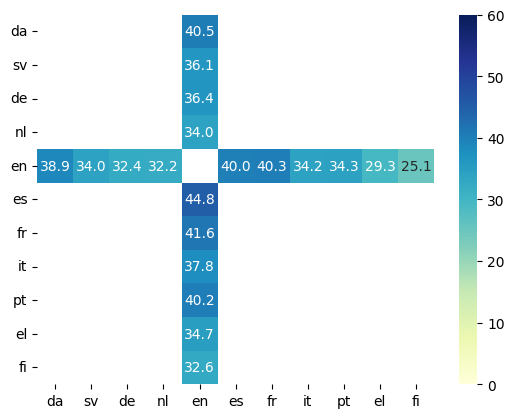


opus-gpt


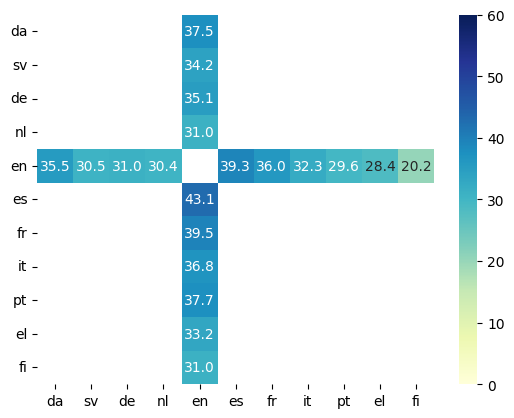

In [34]:
p.show_score_matrices(metric='BLEU')

ep-deepl


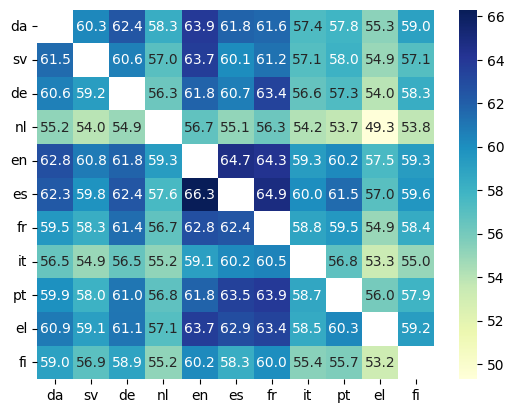


ep-gpt


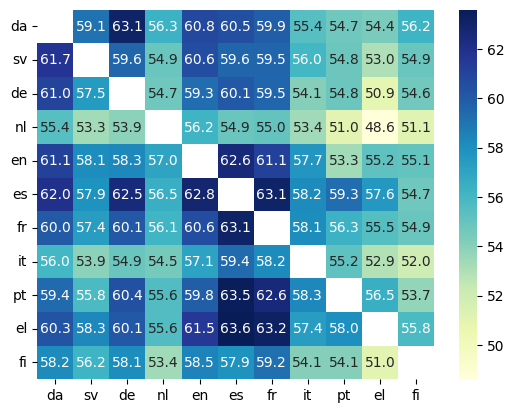


flores-deepl


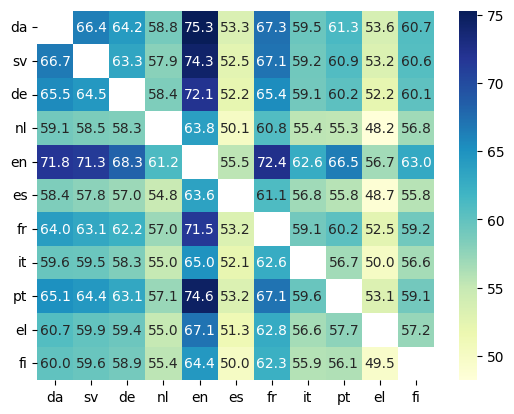


flores-gpt


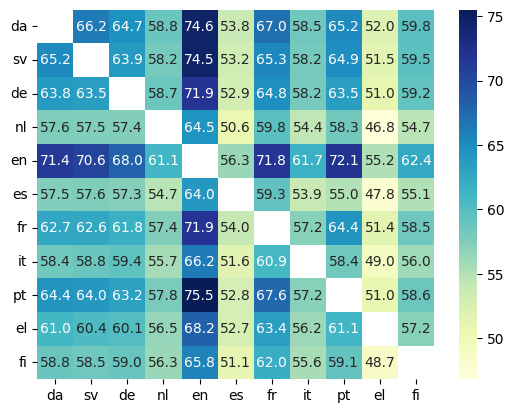


opus-deepl


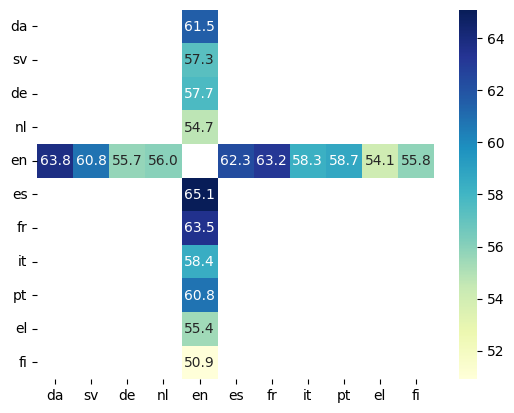


opus-gpt


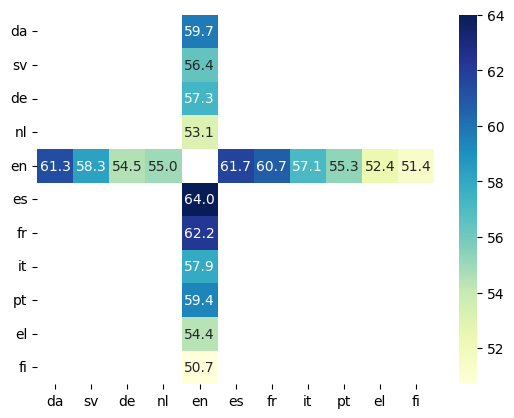

In [35]:
p.show_score_matrices(metric='chrF')

* Similar to the correlation observation, comparing score matrices between BLEU and chrF reveals that chrF evaluates quality of into Finnish translation HIGHER and into Greek translations LOWER than BLEU.
* We can argue that perhaps into Finnish translations are not as worse as they seem, they may be more dependent on the metric than expected
* There is a sharp drop in quality for both metrics when switching from Europarl to Flores for Spanish

## Aggregations
* We reduce 110 scores to 11 by taking their averages and then compare them with Koehn's scores
* We can either take the average of the rows (translating from language) or over the columns (translating into language)
* We can also take the difference between these averages.
* This was done in Koehn's paper and presented in table format, however, since we have different types of scores, we opted to present it more in visual fashion

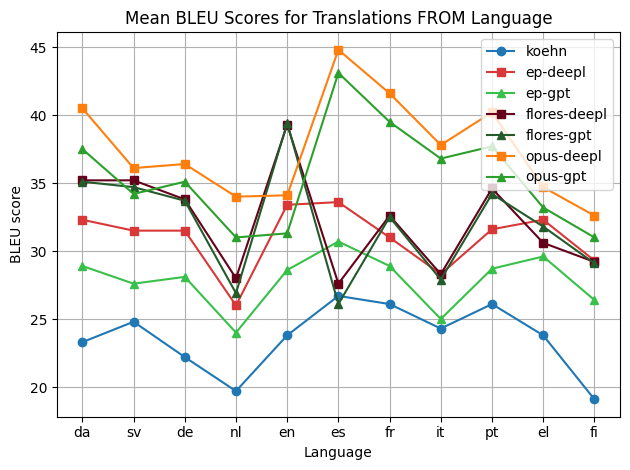

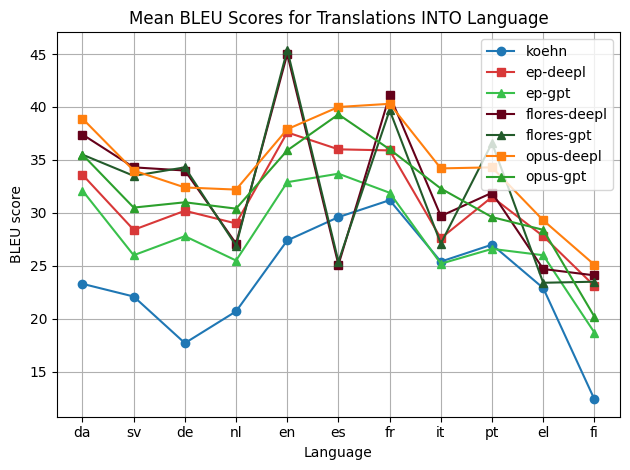

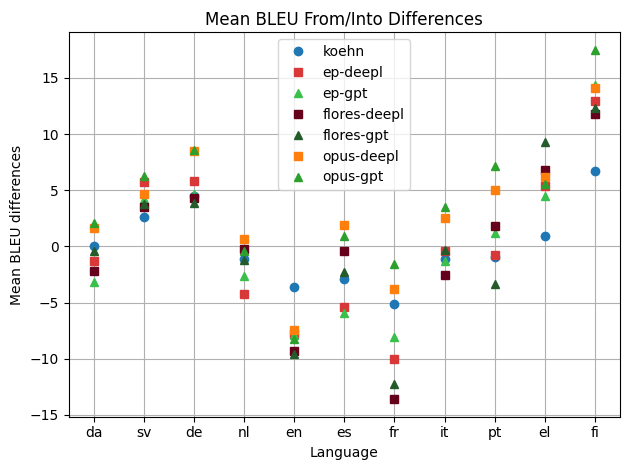

In [36]:
modes = ['FROM', 'INTO', 'DIFF']
for m in modes:
    _ = p.mean_metric_from_or_into_lang(plot=True, mode=m)

* We observe an overall improvement in translation quality as we compare SMT used by Koehn with DeepL and GPT
* The quality seems to depend on the dataset as well, with Flores+ having higher scores (more or less)
* We observe also general tendencies, such as higher quality for romantic languages, these tendencies, at least for EuroParl, were more or less preserved.
* If we look at the From/Into Differences, positive = easier to translate from, negative = easier to translate into, we observe stark differences based on translator & datasets

## Focus on Scores
* We visualize scores and aggregate only on datasets or translators (to avoid having too many things within the graph)

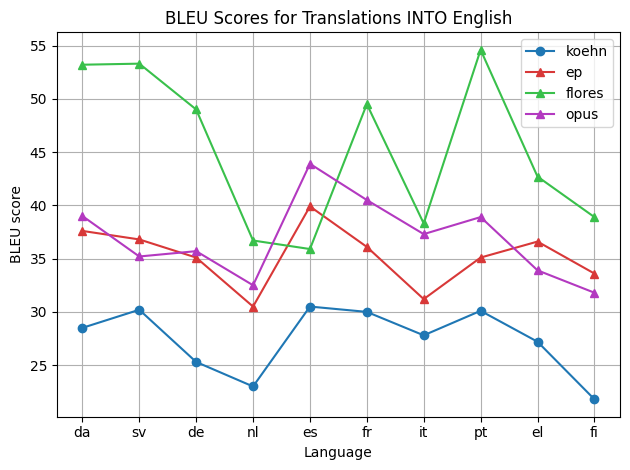

In [37]:
data = p.metric_from_or_into_language(plot=True, merge='DATASET')

* We observe an interesting pattern of OPUS100 being about between FLORES+ and EuroParl
* Can be confirmed by checking the mean of the resp. `pandas.DataFrame`

In [38]:
data.head(2)
# koehn column shows mean bleu scores from koehn's paper
# other columns show difference to koehn's scores, other - koehn, positive = higher than koehn


,koehn,ep,flores,opus
lang,,,,
da,28.5,9.1,24.7,10.5
sv,30.2,6.6,23.1,5.0


In [39]:
data.mean().drop('koehn')

ep         7.81
flores    17.77
opus       9.43
dtype: float64

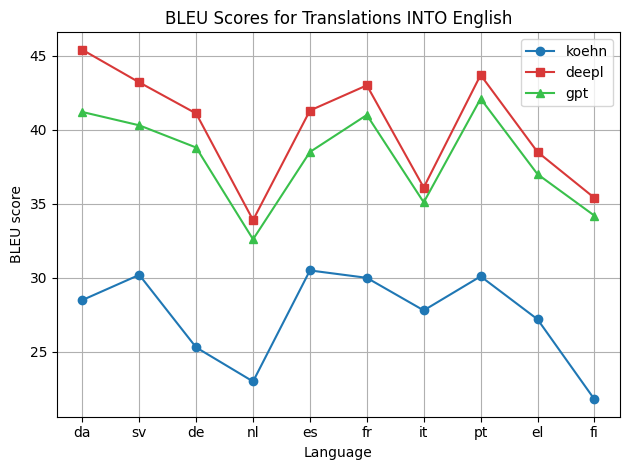

In [40]:
_ = p.metric_from_or_into_language(plot=True, merge='TRANSLATOR')

## Comet

In [41]:
from scripts.presentation import Presenter2
# Contains aligned results (aligned + sentence split with bertalign)
p = Presenter2(results_folder='comet_results', metrics=['BLEU', 'chrF', 'COMET'])

Datasets: ['ep'] : ['ep']
Translators: ['deepl'] : ['deepl']
Pearson correlation: -0.31 (p = 9.4e-04)
Spearman correlation: -0.26 (p = 6.9e-03)



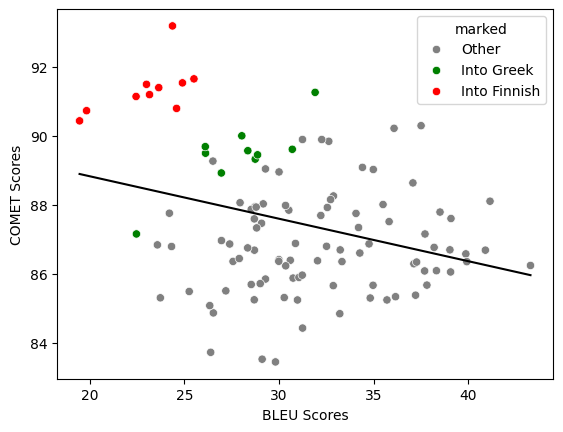

Datasets: ['ep'] : ['ep']
Translators: ['gpt'] : ['gpt']
Pearson correlation: -0.27 (p = 4.1e-03)
Spearman correlation: -0.18 (p = 6.4e-02)



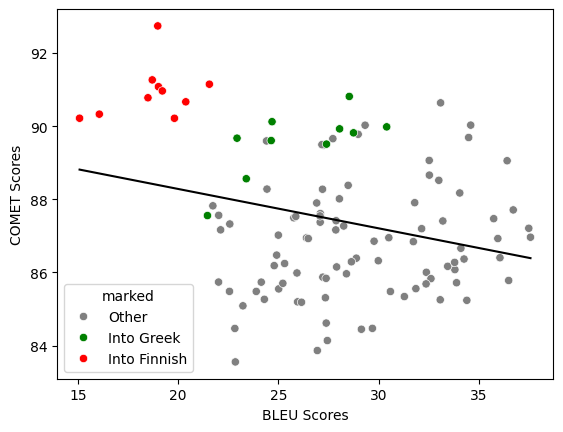

In [42]:
datasets = ['ep']
translators = ['deepl', 'gpt']

for d in datasets:
    for t in translators:
        config1 = {
            'datasets': [d],
            'translators': [t],
            'metric': 'BLEU'
        }
        config2 = {
            'datasets': [d],
            'translators': [t],
            'metric': 'COMET'
        }
        p.show_correlations(config1, config2)
        p.linear_regression(config1, config2, x_label='BLEU Scores', y_label='COMET Scores', custom_color={'tgt_lang':{'fi':'red', 'el':'green'}})

Datasets: ['ep'] : ['ep']
Translators: ['deepl'] : ['deepl']
Pearson correlation: -0.31 (p = 9.4e-04)
Spearman correlation: -0.26 (p = 6.9e-03)



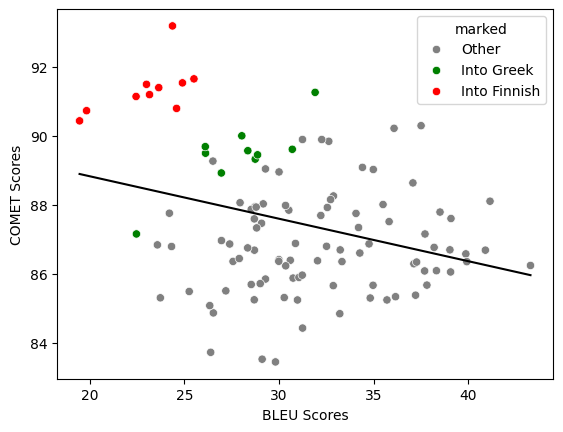

Datasets: ['flores'] : ['flores']
Translators: ['deepl'] : ['deepl']
Pearson correlation: 0.29 (p = 2.4e-03)
Spearman correlation: 0.26 (p = 6.9e-03)



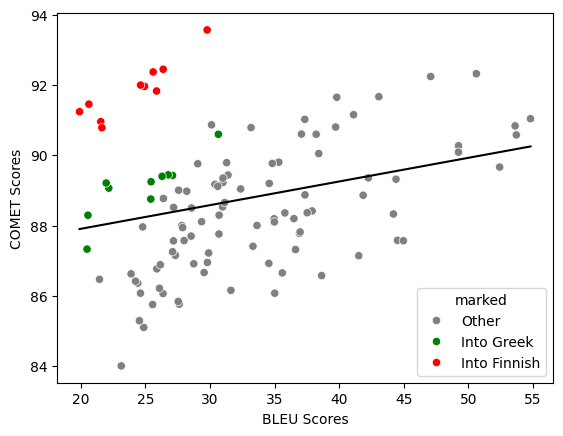

In [43]:
datasets = ['ep', 'flores']
translators = ['deepl']

for d in datasets:
    for t in translators:
        config1 = {
            'datasets': [d],
            'translators': [t],
            'metric': 'BLEU'
        }
        config2 = {
            'datasets': [d],
            'translators': [t],
            'metric': 'COMET'
        }
        p.show_correlations(config1, config2)
        p.linear_regression(config1, config2, x_label='BLEU Scores', y_label='COMET Scores', custom_color={'tgt_lang': {'fi':'red', 'el':'green'}})

Datasets: ['ep'] : ['flores']
Translators: ['deepl'] : ['deepl']
Pearson correlation: 0.78 (p = 5.0e-24)
Spearman correlation: 0.75 (p = 3.9e-21)



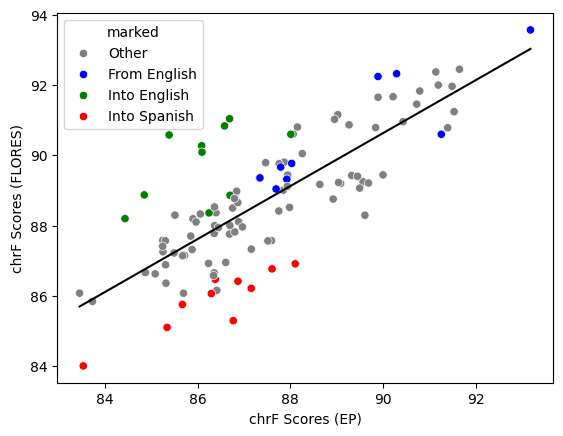

In [48]:

config1 = {
    'datasets': ['ep'],
    'translators': ['deepl'],
    'metric': 'COMET'
}
config2 = {
    'datasets': ['flores'],
    'translators': ['deepl'],
    'metric': 'COMET'
}
p.show_correlations(config1, config2)
_ = p.linear_regression(config1, config2, x_label='chrF Scores (EP)',
                            y_label='chrF Scores (FLORES)',
                            plot=True,
                            custom_color={'tgt_lang': {'es': 'red', 'en': 'green'},
                                          'src_lang': {'en': 'blue'}})

ep-deepl


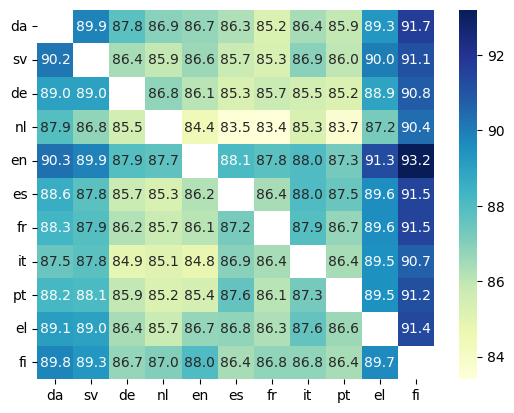


ep-gpt


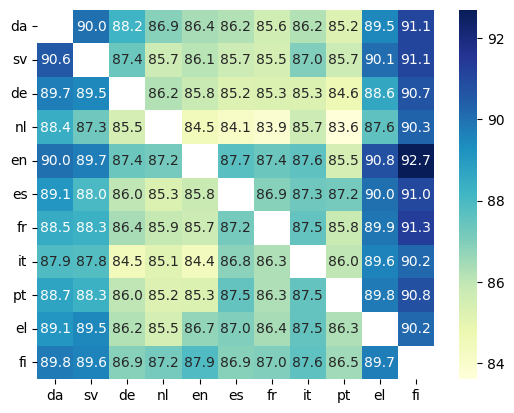


flores-deepl


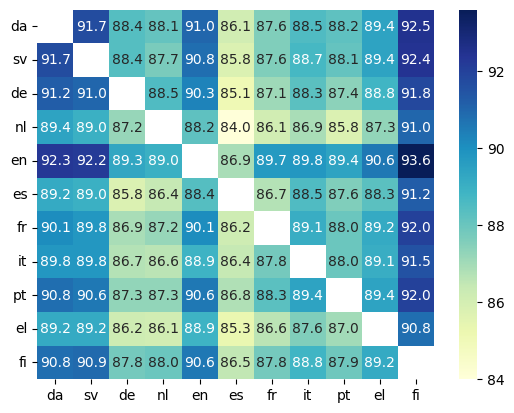

In [49]:
p.show_score_matrices(metric='COMET')